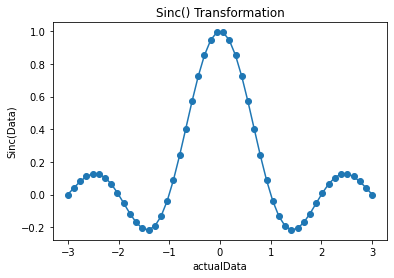

In [24]:
# Assignment 4
# Author: David Bui
# DSC-540
# Date: 11/24/2021

# Python program showing Graphical 
# representation of sinc() function 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.svm import SVR
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# a. Generate 50 data points from this function in the range [– 3, 3].
actualdata = np.reshape(np.linspace(-3, 3, 50), (50,1))
sincdata = np.sinc(np.linspace(-3, 3, 50))

plt.plot(actualdata, sincdata, marker = "o") 
plt.title("Sinc() Transformation") 
plt.xlabel("actualData") 
plt.ylabel("Sinc(Data)") 
plt.show() 

In [25]:
# b. Add Gaussian noise to the data.
noise = np.random.normal(0,0.5,50) #using normal since sinc is similar.
testdata = sincdata + noise
testdata

array([-0.31725317, -0.53488543, -0.65406376,  1.07043406,  0.01701631,
        0.97616144,  0.42947149,  0.13454372, -1.04880039, -0.14767362,
       -0.01087949, -0.44657472, -0.4312768 ,  0.00626448, -0.38152132,
       -0.46916364,  0.52717726, -1.02374374, -0.02697457,  0.43621326,
        1.14347811,  0.83105061,  1.67440557,  0.93251767,  0.53491064,
        1.02329028,  0.62731724,  1.253077  ,  0.99802416,  0.76879698,
        0.38174499,  0.54493965,  1.01315026,  0.09294542,  0.05452691,
       -0.21178463, -0.01259257, -0.02430273,  0.45556309, -0.14732509,
        0.82661424, -0.54155311,  0.21999821, -0.05664508, -0.4833991 ,
       -0.05841535,  0.54074974, -0.13084169,  0.0826314 ,  0.09452745])

In [38]:
# c.Train an SVM regressor with the data generated in (a). Define (and explain) suitable parameters required for training the regressor. 
# incrementing parameters for cross-validation
K = 5 # 5-fold cross valiations

parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
print("Tuning hyper-parameters")

from sklearn.metrics import make_scorer
scorer = make_scorer(mean_squared_error, greater_is_better=False)
svm = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = K, scoring=scorer)

svm.fit(actualdata, testdata)

# Checking the score for all parameters
print("Grid scores on training set:")
means = svm.cv_results_['mean_test_score']
stds = svm.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svm.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

Tuning hyper-parameters
Grid scores on training set:
-0.429 (+/-0.682) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
-0.435 (+/-0.673) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
-0.508 (+/-0.602) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
-0.611 (+/-0.531) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
-0.630 (+/-0.583) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
-0.375 (+/-0.358) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
-0.339 (+/-0.309) for {'C': 1, 'gamma': 0.6, 'kernel': 'rbf'}
-0.306 (+/-0.261) for {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}
-0.435 (+/-0.673) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
-0.511 (+/-0.591) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
-0.493 (+/-0.596) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
-1.039 (+/-1.216) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
-0.539 (+/-0.614) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
-0.352 (+/-0.424) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
-0.327 (+/-0.383) for {'C': 10, 'gamma': 0.6, 'kernel': 'rbf'

In [42]:
# summary of the best parameters. The most important to note are the epsilon and
#   model C. Seeing how they play the largest impact on the accuracy of our model.

score = svm.score(testdata.reshape(-1,1),actualdata)
print("R-squared:", score)
print("MSE:", mean_squared_error(testdata.reshape(-1,1),actualdata.reshape(-1,1)))
svm.get_params()

R-squared: -3.3873274308495094
MSE: 3.308173372727058


{'cv': 5,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__coef0': 0.0,
 'estimator__degree': 3,
 'estimator__epsilon': 0.01,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVR(epsilon=0.01),
 'n_jobs': None,
 'param_grid': [{'kernel': ['rbf'],
   'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
   'C': [1, 10, 100, 1000, 10000]}],
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': make_scorer(mean_squared_error, greater_is_better=False),
 'verbose': 0}

In [ ]:
# d. Describe the functionality of the regressor.
# This regressor depicts an optimization of a margin or line that would best serve
#   as a threshold for classification. Yet here I am using the accuracy of my
#   predictions as a form of evaluation for that margin.

In [ ]:
# e. Discuss the potential use of the regressor and quantify its accuracy.
# This has a wide variety of implementations, especially for binary classification
#   It provides an alternative to the bayesian method and could possibly out
#   perform it. 